In [62]:
from data._main import *
from omegaconf import OmegaConf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [63]:
dataset_name = 'Flavell2023'
config = OmegaConf.load('/home/lrvnc/Projects/worm-graph/conf/dataset.yaml')
config.dataset.name = dataset_name

dataset = get_dataset(config)

Dataset loaded!
Chosen dataset(s): ['Flavell2023']
Num. of worms: 50



In [64]:
singleWorm = dataset['worm0']
singleCaData = singleWorm['calcium_data']
singleNamedNeuronMask = singleWorm['named_neurons_mask']
singleCaData = singleCaData[:, singleNamedNeuronMask]

In [110]:
# Verify if ts is inside ci element wise
def inside_ci(ts, ci):
    return np.logical_and(ts >= ci[:, 0], ts <= ci[:, 1])

Peak frequency: 0.05263157894736842 Hz


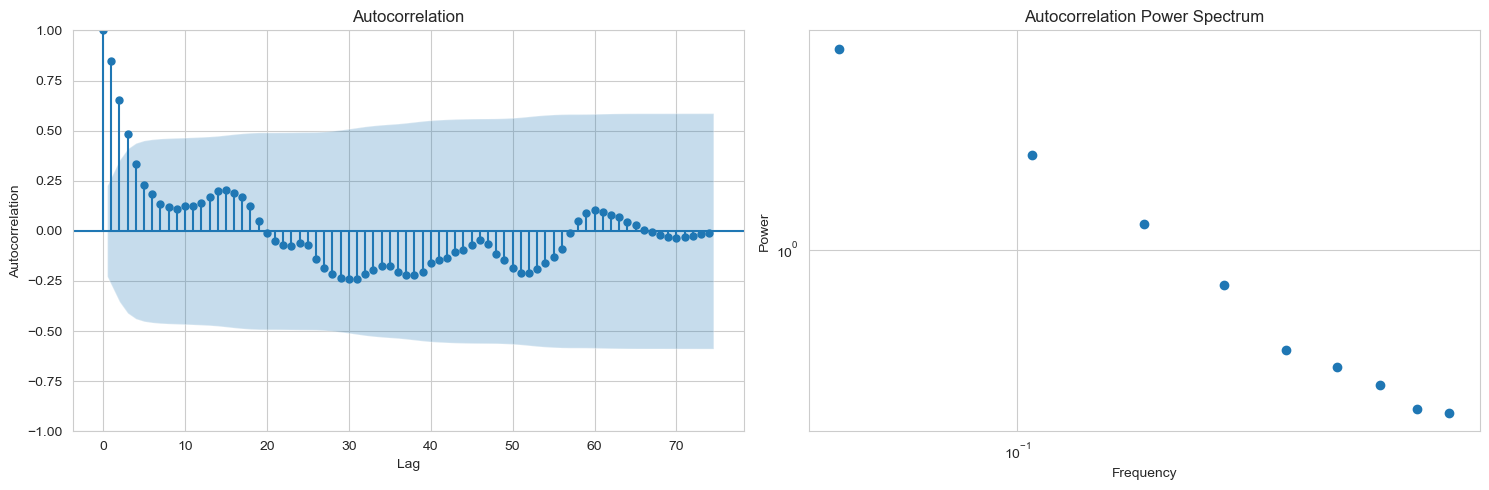

In [119]:
seq_len = 75
ts = singleCaData[:seq_len, 0]

fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.set_style('whitegrid')

ts_acf, ci = acf(ts, adjusted=False, nlags=None, qstat=False, fft=False, alpha=0.05, bartlett_confint=True, missing='none')

# Compute power spectrum of acf
acf_fft = np.fft.fft(ts_acf)
acf_psd = np.abs(acf_fft) ** 2

# Compute frequencies of acf
sample_freq = np.fft.fftfreq(ts_acf.size, d=1)

# Use log-log scale
ax[1].set_xscale('log')
ax[1].set_yscale('log')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[acf_psd[pos_mask].argmax()]

ax[1].scatter(freqs, acf_psd[pos_mask])
ax[1].set_title('Autocorrelation Power Spectrum')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Power')

print('Peak frequency: {} Hz'.format(peak_freq))


plot_acf(ts, ax=ax[0], lags=74, alpha=0.05, use_vlines=True, adjusted=False,
        fft=False, missing='none', title='Autocorrelation', zero=True, auto_ylims=False, bartlett_confint=True, vlines_kwargs=None)
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')
ax[0].set_title('Autocorrelation')

plt.tight_layout()
plt.show()